In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns

In [2]:
df = pd.read_csv('datahouse29.csv')

In [3]:
df.shape

(28683, 5)

<AxesSubplot:>

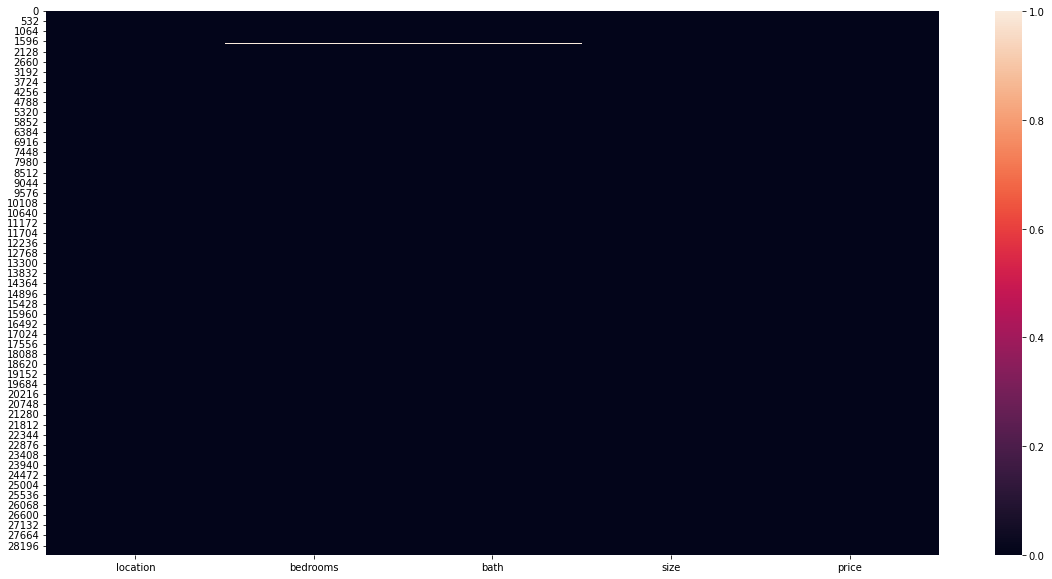

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.describe()

,bedrooms,bath,size
count,28682.000000,28682.000000,28683.000000
mean,2.520187,2.372638,1067.924868
std,0.781235,0.781200,830.246843
min,1.000000,1.000000,200.000000
25%,2.000000,2.000000,700.000000
50%,2.000000,2.000000,900.000000
75%,3.000000,3.000000,1250.000000
max,63.000000,10.000000,100000.000000


In [6]:
#sns.pairplot(df)

In [7]:
#sns.jointplot(x = "size", y = "price", data = df, kind = "reg");

In [8]:
#sns.regplot(x="price", y="size", data=df);

In [9]:
df['price'] = df['price'].str.replace(" ","")

In [10]:
df['size'] = df['size'].astype(float)
df['price'] = df['price'].astype(float)

In [11]:
df.head()

,location,bedrooms,bath,size,price
0,"Sector13,Uttara,Dhaka",3.0,3.0,1400.0,25.0
1,"Farmgate,Tejgaon,Dhaka",2.0,2.0,900.0,20.0
2,"BlockB,NobodoyHousingSociety,Mohammadpur,Dhaka",3.0,3.0,1250.0,18.0
3,"BlockH,BashundharaR-A,Dhaka",3.0,3.0,1600.0,20.0
4,"Gulshan1,Gulshan,Dhaka",6.0,8.0,6400.0,300.0


In [12]:
df2 = df.drop_duplicates()

In [13]:
df2.shape

(15547, 5)

In [14]:
df2.isnull().sum()

location    0
bedrooms    1
bath        1
size        0
price       0
dtype: int64

In [15]:
df3=df2.dropna()

<AxesSubplot:>

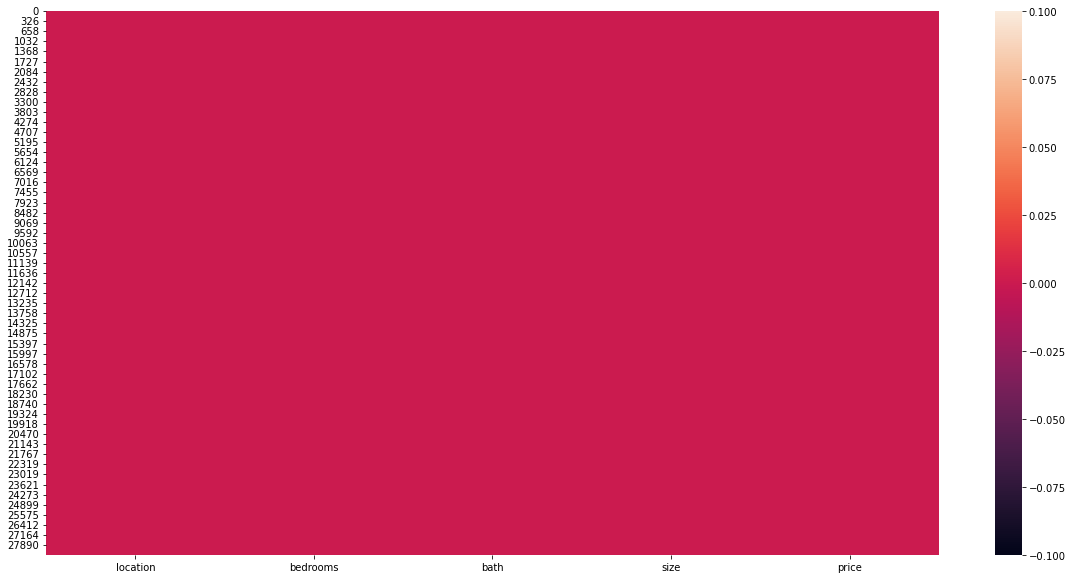

In [16]:
df3.shape
sns.heatmap(df3.isnull())

In [17]:
df3.location = df3.location.apply(lambda x: x.strip())

C:\Users\zziid\AppData\Local\Temp\ipykernel_21796\1546814724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.location = df3.location.apply(lambda x: x.strip())


In [18]:
df3.describe()

,bedrooms,bath,size,price
count,15546.000000,15546.000000,15546.000000,15546.000000
mean,2.591856,2.417921,1130.061559,21.574052
std,0.923630,0.879697,700.887673,27.008920
min,1.000000,1.000000,200.000000,1.100000
25%,2.000000,2.000000,750.000000,13.000000
50%,3.000000,2.000000,1000.000000,17.000000
75%,3.000000,3.000000,1300.000000,24.000000
max,63.000000,10.000000,30898.000000,2100.000000


In [19]:
df4 = df3.copy()

In [20]:
df5 = df4[df4['bedrooms']<6]
df6 = df5[df5['bath']<6]
df7 = df6[df6['size']<3000]
df8 = df7[df7['size']>300]
df9 = df8[df8['price']<120]
df10 = df9[df9['price']>5]
df10.shape

(15215, 5)

In [21]:
df9 = df10.copy()

In [22]:
df9.describe()

,bedrooms,bath,size,price
count,15215.000000,15215.000000,15215.000000,15215.000000
mean,2.553861,2.377391,1076.818732,20.675876
std,0.613893,0.809152,442.768157,12.186627
min,1.000000,1.000000,320.000000,6.300000
25%,2.000000,2.000000,720.000000,13.500000
50%,3.000000,2.000000,1000.000000,17.000000
75%,3.000000,3.000000,1300.000000,24.000000
max,5.000000,5.000000,2970.000000,100.000000


In [23]:
#sns.regplot(x="price", y="size", data=df9);

In [24]:
df6.shape

(15500, 5)

In [25]:

df7.shape

(15326, 5)

In [26]:

df8.shape

(15310, 5)

In [27]:
df9['price_per_sqft']=(df9['price']*100000)/df9['size']
df9

,location,bedrooms,bath,size,price,price_per_sqft
0,"Sector13,Uttara,Dhaka",3.0,3.0,1400.0,25.0,1785.714286
1,"Farmgate,Tejgaon,Dhaka",2.0,2.0,900.0,20.0,2222.222222
2,"BlockB,NobodoyHousingSociety,Mohammadpur,Dhaka",3.0,3.0,1250.0,18.0,1440.000000
3,"BlockH,BashundharaR-A,Dhaka",3.0,3.0,1600.0,20.0,1250.000000
5,"BlockF,BashundharaR-A,Dhaka",3.0,3.0,1650.0,33.0,2000.000000
...,...,...,...,...,...,...
28667,"BlockI,BashundharaR-A,Dhaka",3.0,3.0,1360.0,21.0,1544.117647
28668,"SouthKallyanpur,Kallyanpur,Mirpur,Dhaka",2.0,2.0,720.0,12.0,1666.666667
28669,"MohammadiHousingLTD.,Mohammadpur,Dhaka",3.0,3.0,1500.0,23.0,1533.333333
28671,"Kallyanpur,Mirpur,Dhaka",2.0,2.0,900.0,18.0,2000.000000


In [28]:
#sns.pairplot(df9)

In [29]:
#sns.boxplot(x=df["size"])

In [30]:
#sns.boxplot(x="price", y="size", data=df9)

In [31]:
location_stats = df9.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head()

location
Mohammadpur,Dhaka          290
Dhanmondi,Dhaka            269
Mirpur,Dhaka               240
Sector10,Uttara,Dhaka      184
Kallyanpur,Mirpur,Dhaka    166
Name: location, dtype: int64

In [32]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10.head()

location
Kuratoli,Kuril,Dhaka                              10
BlockD,NobodoyHousingSociety,Mohammadpur,Dhaka    10
MollikaR/A,Section7,Mirpur,Dhaka                  10
BaganBari,Cantonment,Dhaka                        10
WestVatara,Vatara,Badda,Dhaka                     10
Name: location, dtype: int64

In [33]:
df9.location=df9.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df9.location.unique())

343

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df10 = remove_pps_outliers(df9)
df10.shape

(10858, 6)

In [35]:
#sns.pairplot(df10)

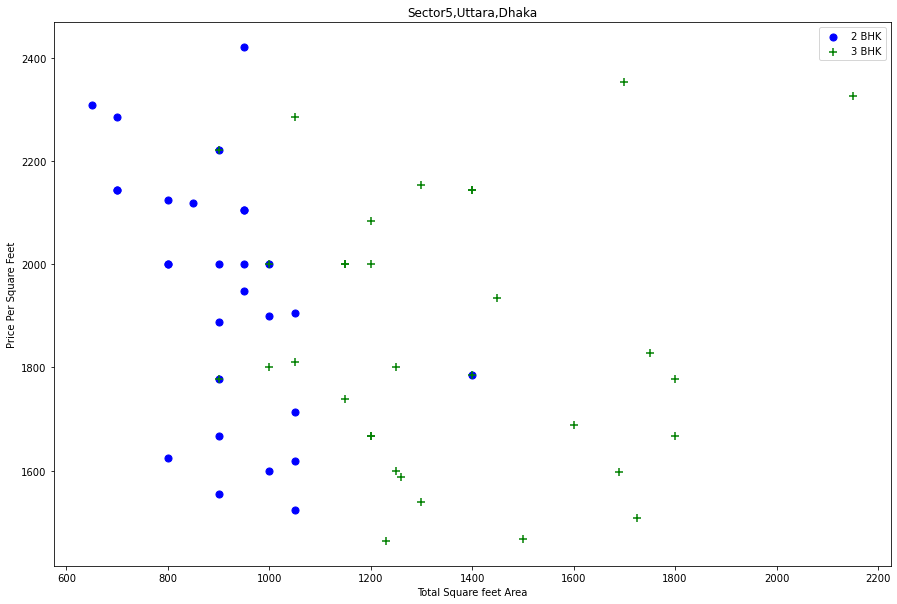

In [36]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bedrooms==2)]
    bhk3=df[(df.location==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['size'],bhk2['price_per_sqft'],color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3['size'],bhk3['price_per_sqft'],marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df10,"Sector5,Uttara,Dhaka")

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df11 = remove_bhk_outliers(df10)
# df8 = df7.copy()
df11.shape

(7320, 6)

In [38]:
#sns.pairplot(df11)

In [39]:
df12 = df11.drop('price_per_sqft',axis='columns')
df12.head(3)

,location,bedrooms,bath,size,price
0,"1stColony,Mirpur,Dhaka",2.0,2.0,600.0,10.5
1,"1stColony,Mirpur,Dhaka",2.0,2.0,700.0,12.0
2,"1stColony,Mirpur,Dhaka",2.0,2.0,800.0,13.5


In [40]:
df12.shape

(7320, 5)

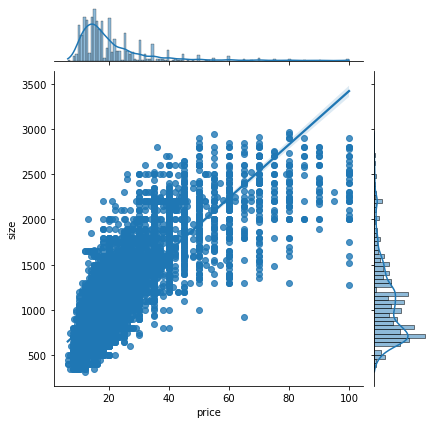

In [41]:
sns.jointplot(x = "price", y = "size", data = df9, kind = "reg");

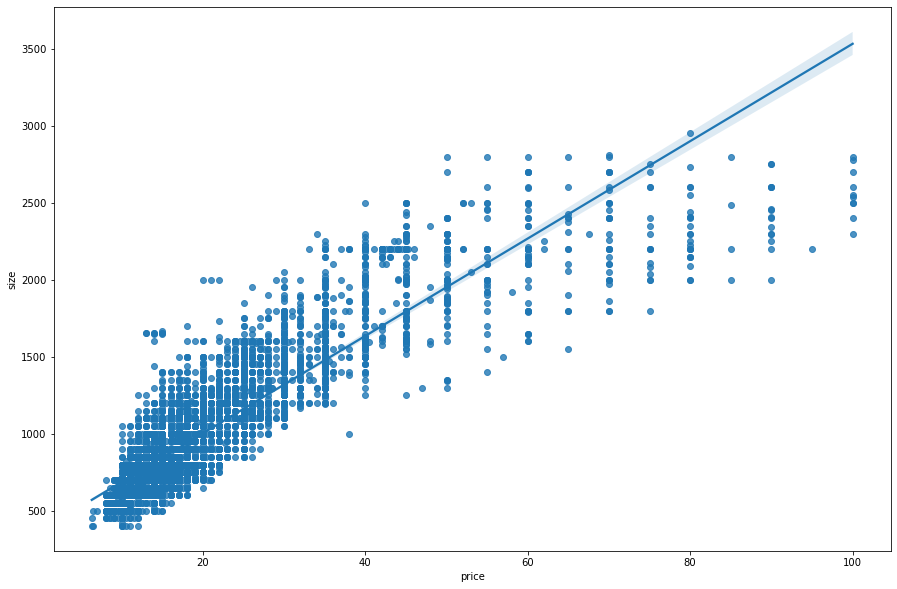

In [42]:
sns.regplot(x="price", y="size", data=df12);

C:\Users\zziid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='size'>

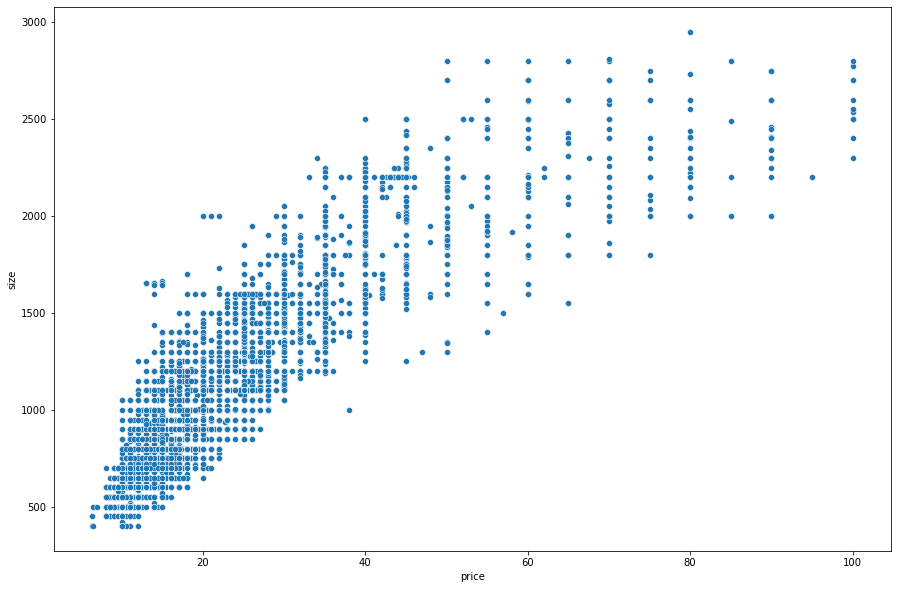

In [43]:
sns.scatterplot(df12['price'],df12['size'])

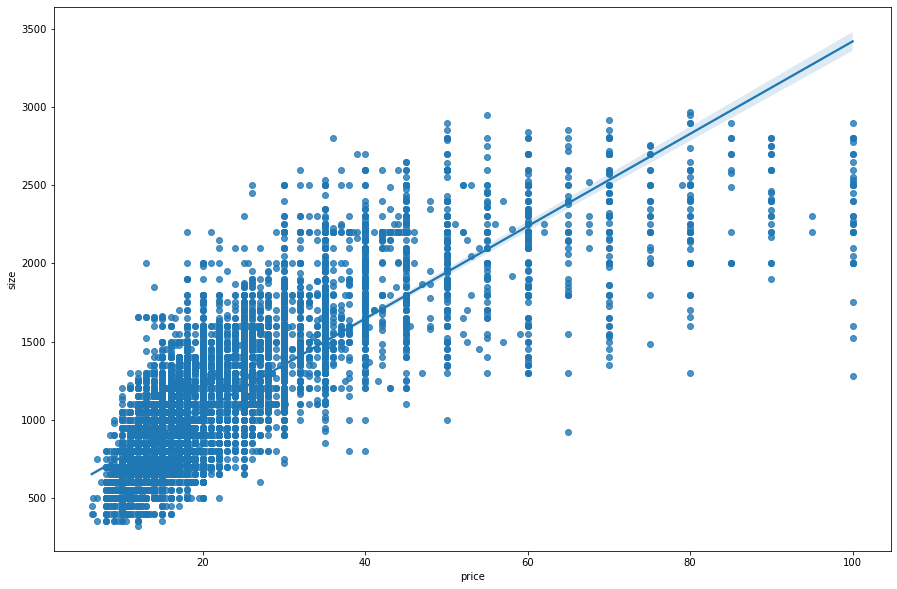

In [44]:
sns.regplot(x="price", y="size", data=df9);

In [45]:
#sns.pairplot(df12)

In [46]:
dummies = pd.get_dummies(df12.location)
dummies.head()

,"1stColony,Mirpur,Dhaka","2ndColony,Mirpur,Dhaka","3rdColony,Mirpur,Dhaka","Aainusbag,DakshinKhan,Dhaka","Abdullahbag,UttarBadda,Badda,Dhaka","AbdurRafiqueHousingSociety,Shekhertek,Mohammadpur,Dhaka","Adabor,Dhaka","Agargaon,Dhaka","AhmedNagar,Mirpur,Dhaka","AliAndNurRealEstate,Mohammadpur,Dhaka",...,"WestDolairpar,Shyampur,Dhaka","WestKafrul,Taltola,Agargaon,Dhaka","WestKalachandpur,Kalachandpur,Dhaka","WestKazipara,Mirpur,Dhaka","WestNakhalpara,Tejgaon,Dhaka","WestRampura,Rampura,Dhaka","WestShewrapara,Mirpur,Dhaka","Zafrabad,Hazaribag,Dhaka","azizMoholla,Mohammadpur,Dhaka",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df13 = pd.concat([df12,dummies.drop('other',axis='columns')],axis='columns')

In [48]:
df13 = df13.drop('location',axis='columns')

In [49]:
X = df13.drop(['price'],axis='columns')
X.head(3)

,bedrooms,bath,size,"1stColony,Mirpur,Dhaka","2ndColony,Mirpur,Dhaka","3rdColony,Mirpur,Dhaka","Aainusbag,DakshinKhan,Dhaka","Abdullahbag,UttarBadda,Badda,Dhaka","AbdurRafiqueHousingSociety,Shekhertek,Mohammadpur,Dhaka","Adabor,Dhaka",...,"WestDhanmondiandShangkar,Dhanmondi,Dhaka","WestDolairpar,Shyampur,Dhaka","WestKafrul,Taltola,Agargaon,Dhaka","WestKalachandpur,Kalachandpur,Dhaka","WestKazipara,Mirpur,Dhaka","WestNakhalpara,Tejgaon,Dhaka","WestRampura,Rampura,Dhaka","WestShewrapara,Mirpur,Dhaka","Zafrabad,Hazaribag,Dhaka","azizMoholla,Mohammadpur,Dhaka"
0,2.0,2.0,600.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,700.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,800.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y = df13.price
y.head(3)

0    10.5
1    12.0
2    13.5
Name: price, dtype: float64

In [51]:
# import pandas
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.svm import SVR
# import numpy as np

In [52]:
# fig, ax = plt.subplots(figsize=(30,22))
# corr_matrix = X.corr().abs()
# sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax,center=0)

In [53]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# X = scaler.fit_transform(X)

In [54]:
# scores = []
# best_svr = SVR(kernel='rbf')
# cv = KFold(n_splits=10, random_state=42, shuffle=False)
# for train_index, test_index in cv.split(X):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

#     X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
#     best_svr.fit(X_train, y_train)
#     scores.append(best_svr.score(X_test, y_test))

In [55]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np

# import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [56]:
# lr = LogisticRegression(solver='liblinear',multi_class='ovr')
# lr.fit(X_train, y_train)
# lr.score(X_test, y_test)

In [57]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
# result = model.score(X_test, y_test)
# print(result)

In [58]:
# from sklearn.model_selection import KFold
# model=DecisionTreeClassifier()
# kfold_validation=KFold(10)

In [59]:
# import numpy as np
# from sklearn.model_selection import cross_val_score
# results=cross_val_score(model,X,y,cv=kfold_validation)
# print(results)
# print(np.mean(results))

In [60]:
# import numpy as np 
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB

In [61]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

In [62]:
#adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 5, learning_rate = 1)
#adb.fit(x_train,y_train)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.959423262825028

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.95942326, 0.95291503, 0.95925098, 0.95747018, 0.95820748])

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\zziid\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\zziid\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

C:\Users\zziid\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\zziid\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\zziid\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. P

,model,best_score,best_params
0,linear_regression,0.952714,{'normalize': True}
1,lasso,0.779855,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.912555,"{'criterion': 'mse', 'splitter': 'best'}"


In [67]:
def predict_price(location,bedrooms,bath,size):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bath
    x[2] = size
    print(loc_index,x[0],x[1],x[2])
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [68]:
predict_price('Sector5,Uttara,Dhaka',3,3,1600)

282 3.0 3.0 1600.0


C:\Users\zziid\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


32.94500338933724

In [69]:
predict_price('AhmedNagar,Mirpur,Dhaka',3,2,1600)

11 3.0 2.0 1600.0


C:\Users\zziid\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


28.255031245582845

In [70]:
predict_price('Bochila,Mohammadpur,Dhaka',4,3,1600)

140 4.0 3.0 1600.0


C:\Users\zziid\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


26.20280737888757

In [71]:
df12['location'].unique()

array(['1stColony,Mirpur,Dhaka', '2ndColony,Mirpur,Dhaka',
       '3rdColony,Mirpur,Dhaka', 'Aainusbag,DakshinKhan,Dhaka',
       'Abdullahbag,UttarBadda,Badda,Dhaka',
       'AbdurRafiqueHousingSociety,Shekhertek,Mohammadpur,Dhaka',
       'Adabor,Dhaka', 'Agargaon,Dhaka', 'AhmedNagar,Mirpur,Dhaka',
       'AliAndNurRealEstate,Mohammadpur,Dhaka', 'Amligola,Lalbagh,Dhaka',
       'Arambagh,Motijheel,Dhaka', 'Ashkona,DakshinKhan,Dhaka',
       'Avenue1,MirpurDOHS,Mirpur,Dhaka',
       'Avenue11,MirpurDOHS,Mirpur,Dhaka',
       'Avenue2,MirpurDOHS,Mirpur,Dhaka',
       'Avenue3,MirpurDOHS,Mirpur,Dhaka',
       'Avenue4,MirpurDOHS,Mirpur,Dhaka',
       'Avenue5,BlockC,Section11,Mirpur,Dhaka',
       'Avenue6,MirpurDOHS,Mirpur,Dhaka', 'Azimpur,Lalbagh,Dhaka',
       'Badda,Dhaka', 'Baigertek,Cantonment,Dhaka',
       'BaitulAmanHousingSociety,Adabor,Dhaka', 'Banani,Dhaka',
       'Banasree,Dhaka', 'Bangshal,Dhaka', 'Baridhara,Dhaka',
       'BaridharaDOHS,Dhaka', 'Barontek,Cantonment,Dhaka

In [72]:
import pickle
with open('dhaka_home_rent_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [73]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))